# Data Testing and Wrangling

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.cluster import KMeans
# from sklearn.cluster import MiniBatchKMeans

full = pd.read_csv('athlete_events.csv')

In [2]:
full.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [3]:
# checking for null values in the datasets
print(full.isnull().sum())

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64


In [4]:
full = full[full['Height'].notna()]
full = full[full['Weight'].notna()]
full = full[full['Age'].notna()]

In [5]:
print(full.isnull().sum())

ID             0
Name           0
Sex            0
Age            0
Height         0
Weight         0
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     175984
dtype: int64


In [6]:
full.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [7]:
eighteen = full[full['Year'] < 1900].sort_values('Year', ascending=True)
nineteen = full[(full['Year'] > 1899) & (full['Year'] < 2000)].sort_values('Year', ascending=True)
twenty = full[full['Year'] > 1999].sort_values('Year', ascending=True)

print('Ninteenth Century: %s \n' % eighteen['Year'].unique())
print('Twentieth Century: %s \n' % nineteen['Year'].unique())
print('Twenty-First Century: %s \n' % twenty['Year'].unique())

Ninteenth Century: [1896] 

Twentieth Century: [1900 1904 1906 1908 1912 1920 1924 1928 1932 1936 1948 1952 1956 1960
 1964 1968 1972 1976 1980 1984 1988 1992 1994 1996 1998] 

Twenty-First Century: [2000 2002 2004 2006 2008 2010 2012 2014 2016] 



In [8]:
#Creates a list of 7 dataframes based on the list of years
dataframes = []
years = [[1896, 1900, 1904, 1906, 1908], [1912, 1920, 1924, 1928, 1932], [1936, 1948, 1952, 1956, 1960], [1964, 1968, 1972, 1976, 1980], [1984, 1988, 1992, 1994, 1996], [1998, 2000, 2002, 2004, 2006], [2008, 2010, 2012, 2014, 2016]]
for x in years:
    pd = full[full['Year'] == x[0]][['Weight', 'Height', 'Sport', 'Sex']]
    for i in range(1,5):
        weight_heightx = full[full['Year'] == (x[i])][['Weight', 'Height', 'Sport', 'Sex']]
        pd.append(weight_heightx)
    dataframes.append(pd)

In [9]:
for j in range(len(dataframes)):
    print(years[j])
    print(dataframes[j].head())

[1896, 1900, 1904, 1906, 1908]
       Weight  Height      Sport Sex
32333    66.0   183.0  Athletics   M
32334    66.0   183.0  Athletics   M
44062    72.0   175.0  Athletics   M
44063    72.0   175.0  Athletics   M
44064    72.0   175.0  Athletics   M
[1912, 1920, 1924, 1928, 1932]
      Weight  Height      Sport Sex
727     78.0   181.0  Athletics   M
728     78.0   181.0  Athletics   M
875     84.0   186.0  Athletics   M
1450    78.0   188.0  Athletics   M
1451    78.0   188.0  Athletics   M
[1936, 1948, 1952, 1956, 1960]
      Weight  Height        Sport Sex
94      70.0   174.0    Athletics   M
125     93.0   194.0     Shooting   M
625     75.0   177.0    Athletics   M
1327    56.0   156.0  Ski Jumping   M
1328    60.0   179.0    Athletics   M
[1964, 1968, 1972, 1976, 1980]
     Weight  Height           Sport Sex
192    97.0   188.0       Wrestling   M
234    67.0   169.0   Weightlifting   M
265    64.0   175.0  Figure Skating   M
312    57.0   168.0       Athletics   M
508   117.

## Distribution of Male/Female Heights and Weights Across the Years

<AxesSubplot:xlabel='Height', ylabel='Weight'>

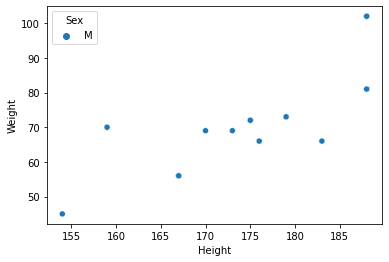

In [10]:
sns.scatterplot(data=eighteen, x='Height', y='Weight', hue='Sex')

<AxesSubplot:xlabel='Height', ylabel='Weight'>

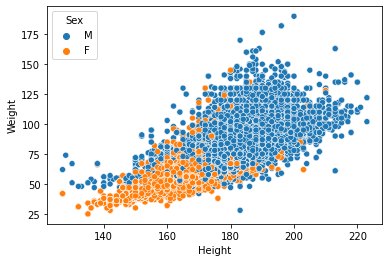

In [11]:
sns.scatterplot(data=nineteen, x='Height', y='Weight', hue='Sex')

<AxesSubplot:xlabel='Height', ylabel='Weight'>

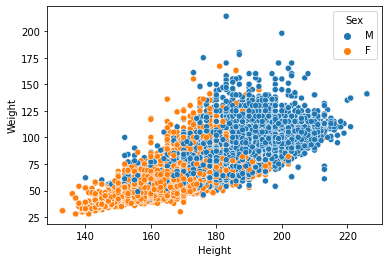

In [12]:
sns.scatterplot(data=twenty, x='Height', y='Weight', hue='Sex')

### More narrow point of view, look instead at a single sport

In [13]:
full['Sport'].unique()

array(['Basketball', 'Judo', 'Speed Skating', 'Cross Country Skiing',
       'Ice Hockey', 'Badminton', 'Sailing', 'Biathlon', 'Gymnastics',
       'Athletics', 'Alpine Skiing', 'Weightlifting', 'Wrestling', 'Luge',
       'Rowing', 'Bobsleigh', 'Swimming', 'Football', 'Equestrianism',
       'Shooting', 'Taekwondo', 'Boxing', 'Fencing', 'Diving', 'Canoeing',
       'Handball', 'Water Polo', 'Tennis', 'Cycling', 'Hockey',
       'Figure Skating', 'Softball', 'Archery', 'Volleyball',
       'Synchronized Swimming', 'Modern Pentathlon', 'Table Tennis',
       'Nordic Combined', 'Baseball', 'Rhythmic Gymnastics',
       'Freestyle Skiing', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Ski Jumping', 'Curling', 'Golf',
       'Snowboarding', 'Short Track Speed Skating', 'Skeleton', 'Rugby',
       'Tug-Of-War', 'Art Competitions', 'Lacrosse', 'Motorboating'],
      dtype=object)

<AxesSubplot:xlabel='Height', ylabel='Weight'>

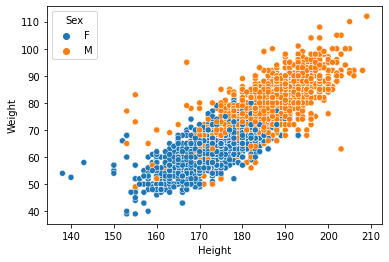

In [14]:
sns.scatterplot(data=twenty[twenty['Sport'] == 'Swimming'], x='Height', y='Weight', hue='Sex')

In [15]:
# sns.scatterplot(data=twenty[twenty['Sport'] == 'Football'], x='Age', y='Weight', hue='Sex')

In [16]:
twenty['Sport'].value_counts(ascending = True)

Golf                           108
Trampolining                   149
Skeleton                       173
Rugby Sevens                   297
Modern Pentathlon              328
Curling                        330
Softball                       358
Rhythmic Gymnastics            436
Beach Volleyball               479
Luge                           486
Nordic Combined                517
Triathlon                      526
Figure Skating                 561
Baseball                       570
Synchronized Swimming          573
Taekwondo                      596
Freestyle Skiing               645
Ski Jumping                    739
Snowboarding                   797
Bobsleigh                      849
Badminton                      958
Diving                         973
Archery                       1007
Short Track Speed Skating     1027
Weightlifting                 1235
Table Tennis                  1240
Water Polo                    1257
Boxing                        1311
Tennis              

# Offline K-means Algorithm

In [17]:
def plotCurrent(X, Rnk, Kmus):
    N, D = np.shape(X)
    K = np.shape(Kmus)[0]

    InitColorMat = np.matrix([[1, 0, 0], 
                              [0, 1, 0],   
                              [0, 0, 1],
                              [0, 0, 0],
                              [1, 1, 0], 
                              [1, 0, 1], 
                              [0, 1, 1]])

    KColorMat = InitColorMat[0:K]
    colorVec = Rnk.dot(KColorMat)
    muColorVec = np.eye(K).dot(KColorMat)

    plt.scatter(X[:,0], X[:,1], edgecolors=colorVec, marker='o', facecolors='none', alpha=0.3)
    plt.scatter(Kmus[:,0], Kmus[:,1], c=muColorVec, marker='D', s=50);
    
def calcSqDistances(X, Kmus):

    N, K = np.shape(X)[0], np.shape(Kmus)[0]
    sqDmat = np.zeros((N, K))
    D = np.shape(X)[1]
    
    for n in range(N):
        for k in range(K):
            sum = 0
            for d in range(D):
                sum = sum + (X[n, d] - Kmus[k, d])**2
            sqDmat[n, k] = (sum)**0.5
    
    return sqDmat

def determineRnk(sqDmat):

    N, K = np.shape(sqDmat)[0], np.shape(sqDmat)[1]
    Rnk = np.zeros((N, K))
    
    for i in range(N):
        min = np.amin(sqDmat[i])
        for j in range(K):
            if sqDmat[i, j] == min:
                Rnk[i, j] = 1
            
    return Rnk


def recalcMus(X, Rnk):
    
    N, K, D = np.shape(X)[0], np.shape(Rnk)[1], np.shape(X)[1]
    Kmus = np.zeros((K, D))
        
    for k in range(K):
        for d in range(D):
            sum = 0
            count = 0
            for n in range(N):
                if Rnk[n, k] == 1:
                    count = count + 1
                    sum = sum + X[n, d]
            
            Kmus[k, d] = sum / count
                        
    return Kmus

def runKMeans(K, array):
    if array.size == 0:
        print('No Data')
        return #
    X = array
    N = np.shape(X)[0]
    D = np.shape(X)[1]
    Kmus = np.zeros((K, D))
    rndinds = np.random.permutation(N)
    Kmus = X[rndinds[:K]];
    maxiters = 1000;
    for iter in range(maxiters):
        sqDmat = calcSqDistances(X, Kmus);
        Rnk = determineRnk(sqDmat)
        KmusOld = Kmus

        Kmus = recalcMus(X, Rnk)
        if sum(abs(KmusOld.flatten() - Kmus.flatten())) < 1e-6:
            plotCurrent(X,Rnk,Kmus)
            break
            
def returnOfflineCenters(K, array):
    if array.size == 0:
        print('No Data')
        return #
    X = array
    N = np.shape(X)[0]
    D = np.shape(X)[1]
    Kmus = np.zeros((K, D))
    rndinds = np.random.permutation(N)
    Kmus = X[rndinds[:K]];
    maxiters = 1000;
    for iter in range(maxiters):
        sqDmat = calcSqDistances(X, Kmus);
        Rnk = determineRnk(sqDmat)
        KmusOld = Kmus

        Kmus = recalcMus(X, Rnk)
        if sum(abs(KmusOld.flatten() - Kmus.flatten())) < 1e-6:
            print('Final Cluster centers = \n %s' % Kmus)
            break

## Testing Offline K-means Algorithm

In [18]:
# twenty[twenty['Sport'] == 'Swimming'][['Height', 'Weight']].to_numpy()

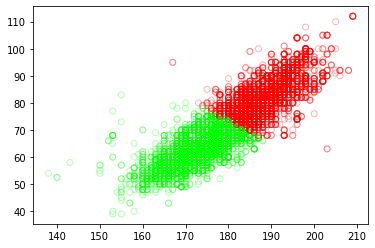

In [19]:
runKMeans(2, twenty[twenty['Sport'] == 'Swimming'][['Height', 'Weight']].to_numpy())

<AxesSubplot:xlabel='Height', ylabel='Weight'>

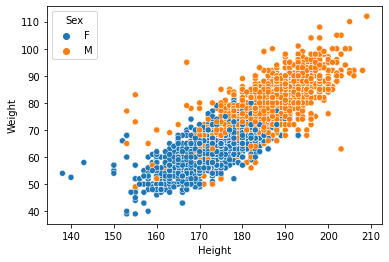

In [20]:
sns.scatterplot(data = twenty[twenty['Sport'] == 'Swimming'], x = 'Height', y = 'Weight', hue = 'Sex')

In [21]:
# Using sklearn.cluster to compute Kmeans algorithm cluster centers
swimming_kmeans = KMeans(n_clusters=2, random_state=0).fit(twenty[twenty['Sport'] == 'Swimming'][['Height', 'Weight']].to_numpy())
swimming_kmeans.cluster_centers_

array([[188.5879773 ,  82.42724458],
       [173.16275764,  63.09109216]])

In [22]:
# Computing the original cluster centers from the actual data
print(twenty[(twenty['Sport'] == 'Swimming') & (twenty['Sex'] == 'M')][['Height', 'Weight']].mean())
print(twenty[(twenty['Sport'] == 'Swimming') & (twenty['Sex'] == 'F')][['Height', 'Weight']].mean())

Height    186.823914
Weight     80.725829
dtype: float64
Height    173.501180
Weight     62.942988
dtype: float64


In [23]:
# twenty[twenty['Sport'] == 'Golf'][['Height', 'Weight']].to_numpy()

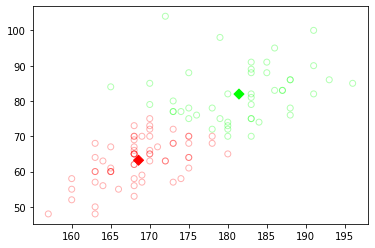

In [24]:
runKMeans(2, twenty[twenty['Sport'] == 'Golf'][['Height', 'Weight']].to_numpy())

<AxesSubplot:xlabel='Height', ylabel='Weight'>

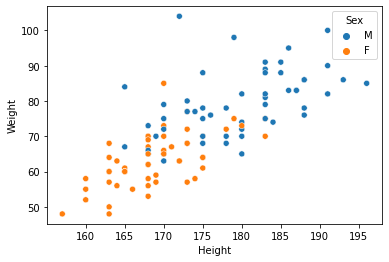

In [25]:
sns.scatterplot(data=twenty[twenty['Sport'] == 'Golf'], x='Height', y='Weight', hue='Sex')

In [26]:
# Using sklearn.cluster to compute Kmeans algorithm cluster centers
golf_kmeans = KMeans(n_clusters=2, random_state=0).fit(twenty[twenty['Sport'] == 'Golf'][['Height', 'Weight']].to_numpy())
golf_kmeans.cluster_centers_

array([[168.56451613,  63.20967742],
       [181.43478261,  81.95652174]])

In [27]:
returnOfflineCenters(2, twenty[twenty['Sport'] == 'Golf'][['Height', 'Weight']].to_numpy())

Final Cluster centers = 
 [[168.56451613  63.20967742]
 [181.43478261  81.95652174]]


In [28]:
# Computing the original cluster centers from the actual data
print(twenty[(twenty['Sport'] == 'Golf') & (twenty['Sex'] == 'M')][['Height', 'Weight']].mean())
print(twenty[(twenty['Sport'] == 'Golf') & (twenty['Sex'] == 'F')][['Height', 'Weight']].mean())

Height    179.320755
Weight     79.245283
dtype: float64
Height    168.963636
Weight     63.436364
dtype: float64


In [29]:
# full['Sport'].value_counts(ascending = True)

In [30]:
# runKMeans(2, full[full['Sport'] == 'Swimming'][['Height', 'Weight']].to_numpy())

In [31]:
# eighteen['Sport'].value_counts(ascending=True)

In [32]:
# nineteen['Sport'].value_counts(ascending=True)

In [33]:
# twenty['Sport'].value_counts(ascending=True)

# Online K-Means Algorithm

In [34]:
def runSequentialKMeans(weight, frequency, array):
    K = 2
    X = array
    N, D = np.shape(X)
    rndinds = np.random.permutation(N)
    Kmus = X[rndinds[:K]];
    Rnk = np.zeros((1, K))
    counter = 1
    
    firstClusterArray = []
    secondClusterArray = []

    # within this loop, it takes a datapoint and compares it to the K cluster centers
    # creates a 1xK matrix where 1 represents the closest cluster and 0 otherwise
    for i in array:
        Rnk = np.zeros((1, K))
        printedX = X[:counter, :]
        min = 0
        
        for j in range(K):
            Rnk[:, j] = math.dist(i, Kmus[j])
            min = np.amin(Rnk)
        
        # changes Rnk from values of distances to 1s and 0s representing closest cluster and otherwise
        for j in range(K):
            if Rnk[:, j] == min:
                Rnk[:, j] = 1
            else:
                Rnk[:, j] = 0
            
        # let's say have the 'weight' parameter be between 0 and 1
        if (((weight > 0) and (weight <= 1)) == False):
            print("Weight parameter must be greater than 0 and less than or equal to 1")
            break
        
        # moving the Kmus datapoint closer to the new datapoint
        for j in range(K):
            if Rnk[:, j] == 1:
                deltaX = i[0] - Kmus[j][0]
                deltaY = i[1] - Kmus[j][1]
                deltaXWeight = deltaX * weight
                deltaYWeight = deltaY * weight
                Kmus[j][0] += deltaXWeight
                Kmus[j][1] += deltaYWeight        
        
        # add points to their corresponding arrays so they can be color coded
        if Rnk[0, 0] == 1:
            firstClusterArray.append(i)
        if Rnk[0, 1] == 1:
            secondClusterArray.append(i)
            
        counter += 1
        
        if (frequency == 0):
            break
        elif (counter % frequency == 0):
            plt.scatter(Kmus[:, 0], Kmus[:, 1], marker ='D')
            if ((firstClusterArray != []) and (secondClusterArray != [])):
                firstCluster = np.array(firstClusterArray)
                secondCluster = np.array(secondClusterArray)
                plt.scatter(firstCluster[:, 0], firstCluster[:, 1], marker='o', color='red',facecolors='none' , alpha=0.3)
                plt.scatter(secondCluster[:, 0], secondCluster[:, 1], marker='o', color='green',facecolors='none', alpha=0.3)
            plt.show()
    
    if (frequency == 0):
        print('Final Cluster centers = \n %s' % Kmus)
        return
    
    plt.scatter(Kmus[:, 0], Kmus[:, 1], marker = 'D')
    if ((firstClusterArray != []) and (secondClusterArray != [])):
        firstCluster = np.array(firstClusterArray)
        secondCluster = np.array(secondClusterArray)
        plt.scatter(firstCluster[:, 0], firstCluster[:, 1], marker='o', color='red',facecolors='none', alpha=0.3)
        plt.scatter(secondCluster[:, 0], secondCluster[:, 1], marker='o', color='green',facecolors='none', alpha=0.3)
    plt.show()
    
    print('Final Cluster centers = \n %s' % Kmus)

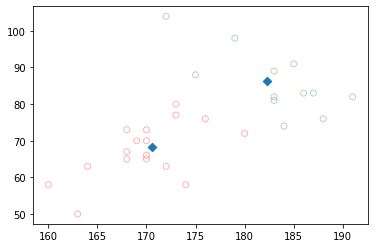

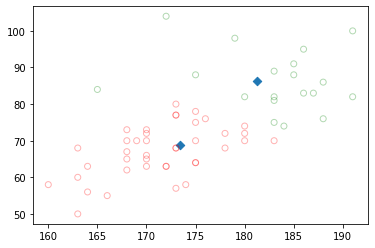

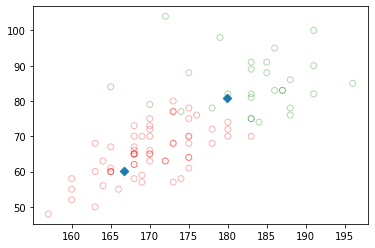

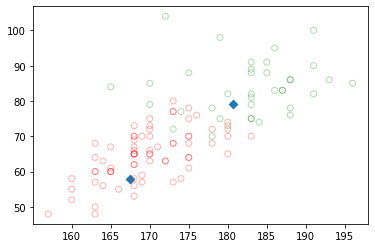

Final Cluster centers = 
 [[167.5226344   58.01890482]
 [180.62808949  79.23645435]]


In [35]:
runSequentialKMeans(.20, 30, twenty[twenty['Sport'] == 'Golf'][['Height', 'Weight']].to_numpy())